In [13]:
import pandas as pd
import numpy as np
import sklearn
import os
import sys
import matplotlib.pyplot as plt
%matplotlib inline

# Task 1: 
create a table with 3 columns: day, employee_headcount, company_id

In [2]:
dat = pd.read_csv("employee_retention_data.csv", ).infer_objects()
dat.join_date = pd.to_datetime(dat.join_date, infer_datetime_format=True)
dat.quit_date = pd.to_datetime(dat.quit_date, infer_datetime_format=True)
# dat.astype({'join_date': })
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24702 entries, 0 to 24701
Data columns (total 7 columns):
employee_id    24702 non-null float64
company_id     24702 non-null int64
dept           24702 non-null object
seniority      24702 non-null int64
salary         24702 non-null float64
join_date      24702 non-null datetime64[ns]
quit_date      13510 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(2), object(1)
memory usage: 1.3+ MB


In [3]:
dat_join = dat.groupby(['join_date', 'company_id']).size().reset_index()
dat_join.columns = ['join_date','company_id','join_count']
dat_quit = dat.groupby(['quit_date', 'company_id']).size().reset_index()
dat_quit.columns = ['quit_date','company_id','quit_count']

In [4]:
ts = pd.date_range('24/01/2011','13/12/2015')
unique_dates = pd.DataFrame({'date':ts})

company_id = pd.unique(dat.company_id)
unique_companies = pd.DataFrame({'company_id':company_id})

unique_dates['key'] = 0
unique_companies['key'] = 0

blank = unique_dates.merge(unique_companies,how='right',on='key')
blank.drop('key',1, inplace=True)

In [5]:
'''
company_list=dat.company_id.unique().tolist()
company_list=sorted(company_list)
date_list = pd.date_range('24/01/2011', '13/12/2015')
blank = pd.MultiIndex.from_product([company_list, date_list],
                                  names = ['company_id', 'date']).to_frame()
'''
# another way to construct the blank, using multiindex from_product
pass

In [6]:
dat_join_update = pd.merge(blank, dat_join, left_on = ['company_id', 'date'],
                          right_on = ['company_id', 'join_date'],
                          how = 'left', sort = True)
dat_quit_update = pd.merge(dat_join_update, dat_quit, left_on = ['company_id', 'date'],
                          right_on = ['company_id', 'quit_date'],
                          how = 'left', sort = True)

In [7]:
dat_reduced = dat_quit_update[['date', 'company_id', 'join_count', 'quit_count']].fillna(0)
dat_reduced.head()

,date,company_id,join_count,quit_count
0,2011-01-24,1,25.0,0.0
1,2011-01-25,1,2.0,0.0
2,2011-01-26,1,2.0,0.0
3,2011-01-27,1,0.0,0.0
4,2011-01-28,1,0.0,0.0


In [8]:
dat_reduced['join_cum'] = dat_reduced.join_count.cumsum(axis = 0)
dat_reduced['quit_cum'] = dat_reduced.quit_count.cumsum(axis = 0)
dat_reduced['employee_headcount'] = dat_reduced.join_cum - dat_reduced.quit_cum
dat_reduced = dat_reduced[['date', 'company_id', 'employee_headcount']]

In [9]:
dat_reduced.head(5)

,date,company_id,employee_headcount
0,2011-01-24,1,25.0
1,2011-01-25,1,27.0
2,2011-01-26,1,29.0
3,2011-01-27,1,29.0
4,2011-01-28,1,29.0


In [10]:
if os.path.isfile('dat_reduced.csv'):
    print('data reduced csv file already exists, refer to root folder')
else:
    dat_reduced.to_csv("dat_reduced.csv", header = True, index = False)

data reduced csv file already exists, refer to root folder


# Task 2: 
what are the main factors that drive employee churn? Do they make sense? Explain your indings

In [11]:
dat.head(5)

,employee_id,company_id,dept,seniority,salary,join_date,quit_date
0,13021.0,7,customer_service,28,89000.0,2014-03-24,2015-10-30
1,825355.0,7,marketing,20,183000.0,2013-04-29,2014-04-04
2,927315.0,4,marketing,14,101000.0,2014-10-13,NaT
3,662910.0,7,customer_service,20,115000.0,2012-05-14,2013-06-07
4,256971.0,2,data_science,23,276000.0,2011-10-17,2014-08-22


## Data Cleaning

{'whiskers': [<matplotlib.lines.Line2D at 0x1bd58cb8a58>,
 'caps': [<matplotlib.lines.Line2D at 0x1bd58cc1128>,
 'boxes': [<matplotlib.lines.Line2D at 0x1bd58cb8908>],
 'medians': [<matplotlib.lines.Line2D at 0x1bd58cc17b8>],
 'fliers': [<matplotlib.lines.Line2D at 0x1bd58cc1b00>],
 'means': []}

<Figure size 720x432 with 0 Axes>

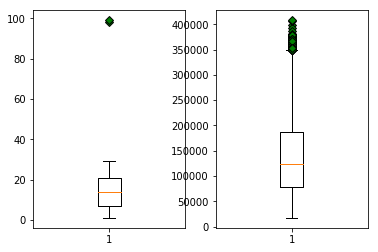

In [23]:
# clean the unreasonable seniority
green_diamond = dict(markerfacecolor='g', marker='D')
plt.figure(figsize = (10, 6))
f, (ax1, ax2) = plt.subplots(1, 2, sharey=False)
ax1.boxplot(dat['seniority'], flierprops=green_diamond)
ax2.boxplot(dat['salary'], flierprops=green_diamond)

I think it s not appropriate to expect the seniors to continue to contribute to the company much longer. They should enjoy their life.

In [ ]:
dat = dat

## Feature Engineering